# LLM-Powered Portfolio Analysis with `Analyzer`

This notebook demonstrates how to use the `Analyzer` class to generate a comprehensive analysis of a randomly generated portfolio. The output is structured as a series of messages, suitable for consumption by a Large Language Model (LLM), particularly one with vision capabilities.

In [1]:
import sys
import os
import random
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image
import base64

from portfolio_analytics.portfolio import Portfolio
from portfolio_analytics.data_provider import DataProvider
from portfolio_analytics.analyzer import Analyzer

## 1. Generate a Random Portfolio

First, we'll create a portfolio by randomly selecting 10 stocks from the available cached data. This ensures the demo runs quickly without fetching data from external APIs.

In [2]:
# Initialize the data provider
data_provider = DataProvider(cache=True, cache_db=None, debug=True)

# Get the list of all available stocks from the cache
# We will select only stocks, not ETFs for the portfolio
available_stocks = data_provider.get_cached_stocks(include_etfs=False)

# If no stocks are found, add a message
if not available_stocks:
    print("No stocks found in cache. Please populate the cache first.")
    portfolio_symbols = []
    weights = []
else:
    # Randomly select 10 stocks
    random.seed(42) # for reproducibility
    
    # Ensure we don't try to sample more stocks than are available
    sample_size = min(10, len(available_stocks))
    portfolio_symbols = random.sample(available_stocks, sample_size)

    # Generate random weights that sum to 1
    weights = np.random.random(len(portfolio_symbols))
    weights /= np.sum(weights)

    print(f"Selected Stocks: {portfolio_symbols}")
    print(f"Weights: {np.round(weights, 2)}")

Found 391 symbols in cache (stocks only from company_list): ['A', 'AA', 'AAPL', 'ABT', 'ACE', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP']...
Selected Stocks: ['SPG', 'BXP', 'AEP', 'WPI', 'FDX', 'EMN', 'DV', 'CINF', 'WMB', 'BMS']
Weights: [0.05 0.17 0.09 0.02 0.05 0.17 0.15 0.05 0.07 0.16]


In [3]:
# Create and load the portfolio only if we have symbols
if portfolio_symbols:
    portfolio = Portfolio(symbols=portfolio_symbols, weights=weights)
    portfolio.load_data(data_provider=data_provider)

    # Check if all symbols have data and adjust if needed
    if portfolio.data is not None:
        available_symbols = list(portfolio.data.columns)
        if len(available_symbols) < len(portfolio_symbols):
            print(f"Warning: Only {len(available_symbols)} out of {len(portfolio_symbols)} symbols have data available.")
            print(f"Available symbols: {available_symbols}")
            
            # Update portfolio to only include symbols with data
            portfolio.symbols = available_symbols
            
            # Recalculate weights for available symbols (maintain proportions)
            original_weights = dict(zip(portfolio_symbols, weights))
            available_weights = [original_weights[symbol] for symbol in available_symbols if symbol in original_weights]
            
            # Normalize weights to sum to 1
            if available_weights:
                available_weights = np.array(available_weights)
                available_weights = available_weights / available_weights.sum()
                portfolio.weights = available_weights
                print(f"Adjusted weights: {np.round(portfolio.weights, 3)}")
            else:
                print("Error: No matching symbols found with data.")
                portfolio = None
        
        if portfolio is not None:
            print("Portfolio data loaded successfully.")
            display(portfolio.data.head())
    else:
        print("Error: No data could be loaded for any symbols.")
        portfolio = None
else:
    print("Cannot create portfolio: No symbols available.")
    portfolio = None

Ignoring 54 missing days in the middle of existing data (gaps)
Fetching SPG for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPG']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching BXP for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BXP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching AEP for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AEP']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Fetching WPI for missing ranges: [('2020-01-01', '2025-07-27')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WPI']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-07-28)')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching FDX for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FDX']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching EMN for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['EMN']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Ignoring 42 missing days in the middle of existing data (gaps)
Fetching DV for missing ranges: [('2020-01-01', '2021-04-20')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2021-04-21) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1618977600")')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching CINF for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CINF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Ignoring 54 missing days in the middle of existing data (gaps)
Fetching WMB for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WMB']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Fetching BMS for missing ranges: [('2020-01-01', '2025-07-27')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-07-28)')


Available symbols: ['SPG', 'BXP', 'AEP', 'FDX', 'EMN', 'DV', 'CINF', 'WMB']
Adjusted weights: [0.067 0.212 0.115 0.059 0.209 0.182 0.067 0.089]
Portfolio data loaded successfully.


Symbol,SPG,BXP,AEP,FDX,EMN,DV,CINF,WMB
Date,,,,,,,,
2020-01-02,106.302391,102.589088,76.578583,140.409866,65.055748,NaN,91.613449,17.191092
2020-01-03,106.492874,103.391144,76.496674,138.671677,62.806446,NaN,92.080330,17.264284
2020-01-06,107.049728,104.117546,76.750664,138.780334,62.442608,NaN,91.371346,17.491150
2020-01-07,105.833473,102.309105,76.767052,140.138275,62.004318,NaN,89.650803,17.491150
2020-01-08,106.529510,101.764313,76.537643,142.247620,62.186237,NaN,89.140663,17.220369


## 2. Select a Random Benchmark

Next, we select a random ETF from the `Sector_ETFs.csv` file to act as a benchmark for our portfolio's performance.

In [4]:
# Only proceed if we have a valid portfolio
if portfolio is not None:
    # Get a list of available ETFs from the data provider's cache
    etf_symbols = data_provider.get_cached_etfs()

    # If no ETFs are found in the cache, fall back to the CSV file for demo purposes
    if not etf_symbols:
        print("No ETFs found in cache, falling back to CSV file.")
        etf_df = pd.read_csv('../sample_data/Sector_ETFs.csv')
        etf_symbols = etf_df['Symbol'].tolist()

    # Select a random ETF as a benchmark
    benchmark_symbol = random.choice(etf_symbols)

    # Fetch benchmark data
    # The data provider will handle fetching from cache or source
    benchmark_data = data_provider.get_price_data([benchmark_symbol])

    print(f"Selected Benchmark: {benchmark_symbol}")
    display(benchmark_data.head())
else:
    print("Skipping benchmark selection: No portfolio available.")
    benchmark_data = None
    benchmark_symbol = None

Found 11 sector ETFs from metadata table: ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
Found 11 total ETF symbols in cache: ['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV']...
Ignoring 54 missing days in the middle of existing data (gaps)
Fetching XLY for missing ranges: [('2020-01-01', '2020-01-01')] from yahoo.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['XLY']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2020-01-02)')


Selected Benchmark: XLY


Symbol,XLY
Date,
2020-01-02,121.004028
2020-01-03,119.974258
2020-01-06,120.307983
2020-01-07,120.117294
2020-01-08,120.479622


## 3. Generate Comprehensive Analysis

Now, we initialize the `Analyzer` with our portfolio and benchmark data. We then call `generate_comprehensive_analysis` to produce all the metrics and visualizations.

In [5]:
# Generate analysis only if we have valid portfolio and benchmark data
if portfolio is not None and benchmark_data is not None:
    # Initialize the analyzer
    analyzer = Analyzer(portfolio=portfolio, benchmark_data=benchmark_data[benchmark_symbol])

    # Generate the complete analysis
    analysis_results = analyzer.generate_comprehensive_analysis()

    print("Comprehensive analysis generated successfully.")
else:
    print("Cannot generate analysis: Missing portfolio or benchmark data.")
    analysis_results = None

Comprehensive analysis generated successfully.


## 4. Create LLM-Ready Messages

This function takes the analysis results and formats them into a list of messages. Each message is a dictionary specifying the content type (`text` or `image`) and the data. This structured format is ideal for an LLM to process sequentially.

In [6]:
def create_llm_messages(analysis_results):
    messages = []
    
    # Message 1: Portfolio Summary
    summary = analysis_results['portfolio_summary']
    summary_text = f"""### Portfolio Summary
**Start Date:** {summary.get('data_start_date', 'N/A')}\n
**End Date:** {summary.get('data_end_date', 'N/A')}\n
**Number of Assets:** {summary.get('number_of_assets', 'N/A')}\n
**Symbols:** {', '.join(summary.get('assets', []))}
"""
    messages.append({'type': 'text', 'content': summary_text, 'intention': 'Provide a high-level overview of the portfolio, including its composition and the analysis period.'})
    
    # Message 2: Key Performance and Risk Metrics
    perf = analysis_results['metrics']['performance']
    risk = analysis_results['metrics']['risk']
    metrics_text = f"""### Key Metrics
**Annual Return:** {perf.get('annual_return', 0):.2%}\n
**Annual Volatility:** {perf.get('annual_volatility', 0):.2%}\n
**Sharpe Ratio:** {perf.get('sharpe_ratio', 0):.2f}\n
**Max Drawdown:** {perf.get('max_drawdown', 0):.2%}\n
**Value at Risk (95%):** {risk.get('var_95', 0):.2%}
"""
    messages.append({'type': 'text', 'content': metrics_text, 'intention': 'Present the most critical performance and risk indicators to give an immediate sense of the portfolio\'s risk-return profile.'})

    # Add messages for each visualization
    visualizations = {
        'portfolio_composition': 'Illustrate how the portfolio is allocated across different assets, showing the weight of each component.',
        'cumulative_returns': 'Compare the portfolio\'s growth over time against the benchmark, providing a clear performance comparison.',
        'drawdown_analysis': 'Visualize the portfolio\'s peak-to-trough declines, highlighting periods of significant loss.',
        'correlation_matrix': 'Show the correlation between assets, which is crucial for understanding diversification.',
        'returns_distribution': 'Provide insight into the statistical properties of the portfolio\'s returns, such as its central tendency, dispersion, and symmetry.'
    }
    
    for key, intention in visualizations.items():
        if key in analysis_results['visualizations']:
            messages.append({
                'type': 'image',
                'content': analysis_results['visualizations'][key],
                'intention': intention
            })
            
    return messages

# Create LLM messages only if analysis results are available
if analysis_results is not None:
    llm_messages = create_llm_messages(analysis_results)
    print(f"Generated {len(llm_messages)} LLM messages successfully.")
else:
    print("Cannot create LLM messages: No analysis results available.")
    llm_messages = []

Generated 7 LLM messages successfully.


## 5. Display Messages and Intentions

Finally, we loop through the generated messages, displaying each one along with an explanation of its purpose. This demonstrates how an LLM could interpret and present the analysis results one by one.

### Message 1: Text

**Intention:** Provide a high-level overview of the portfolio, including its composition and the analysis period.

### Portfolio Summary
**Start Date:** 2020-01-02

**End Date:** 2025-07-25

**Number of Assets:** 8

**Symbols:** SPG, BXP, AEP, FDX, EMN, DV, CINF, WMB


---

### Message 2: Text

**Intention:** Present the most critical performance and risk indicators to give an immediate sense of the portfolio's risk-return profile.

### Key Metrics
**Annual Return:** 5.59%

**Annual Volatility:** 21.95%

**Sharpe Ratio:** 0.16

**Max Drawdown:** 25.80%

**Value at Risk (95%):** 2.16%


---

### Message 3: Image

**Intention:** Illustrate how the portfolio is allocated across different assets, showing the weight of each component.

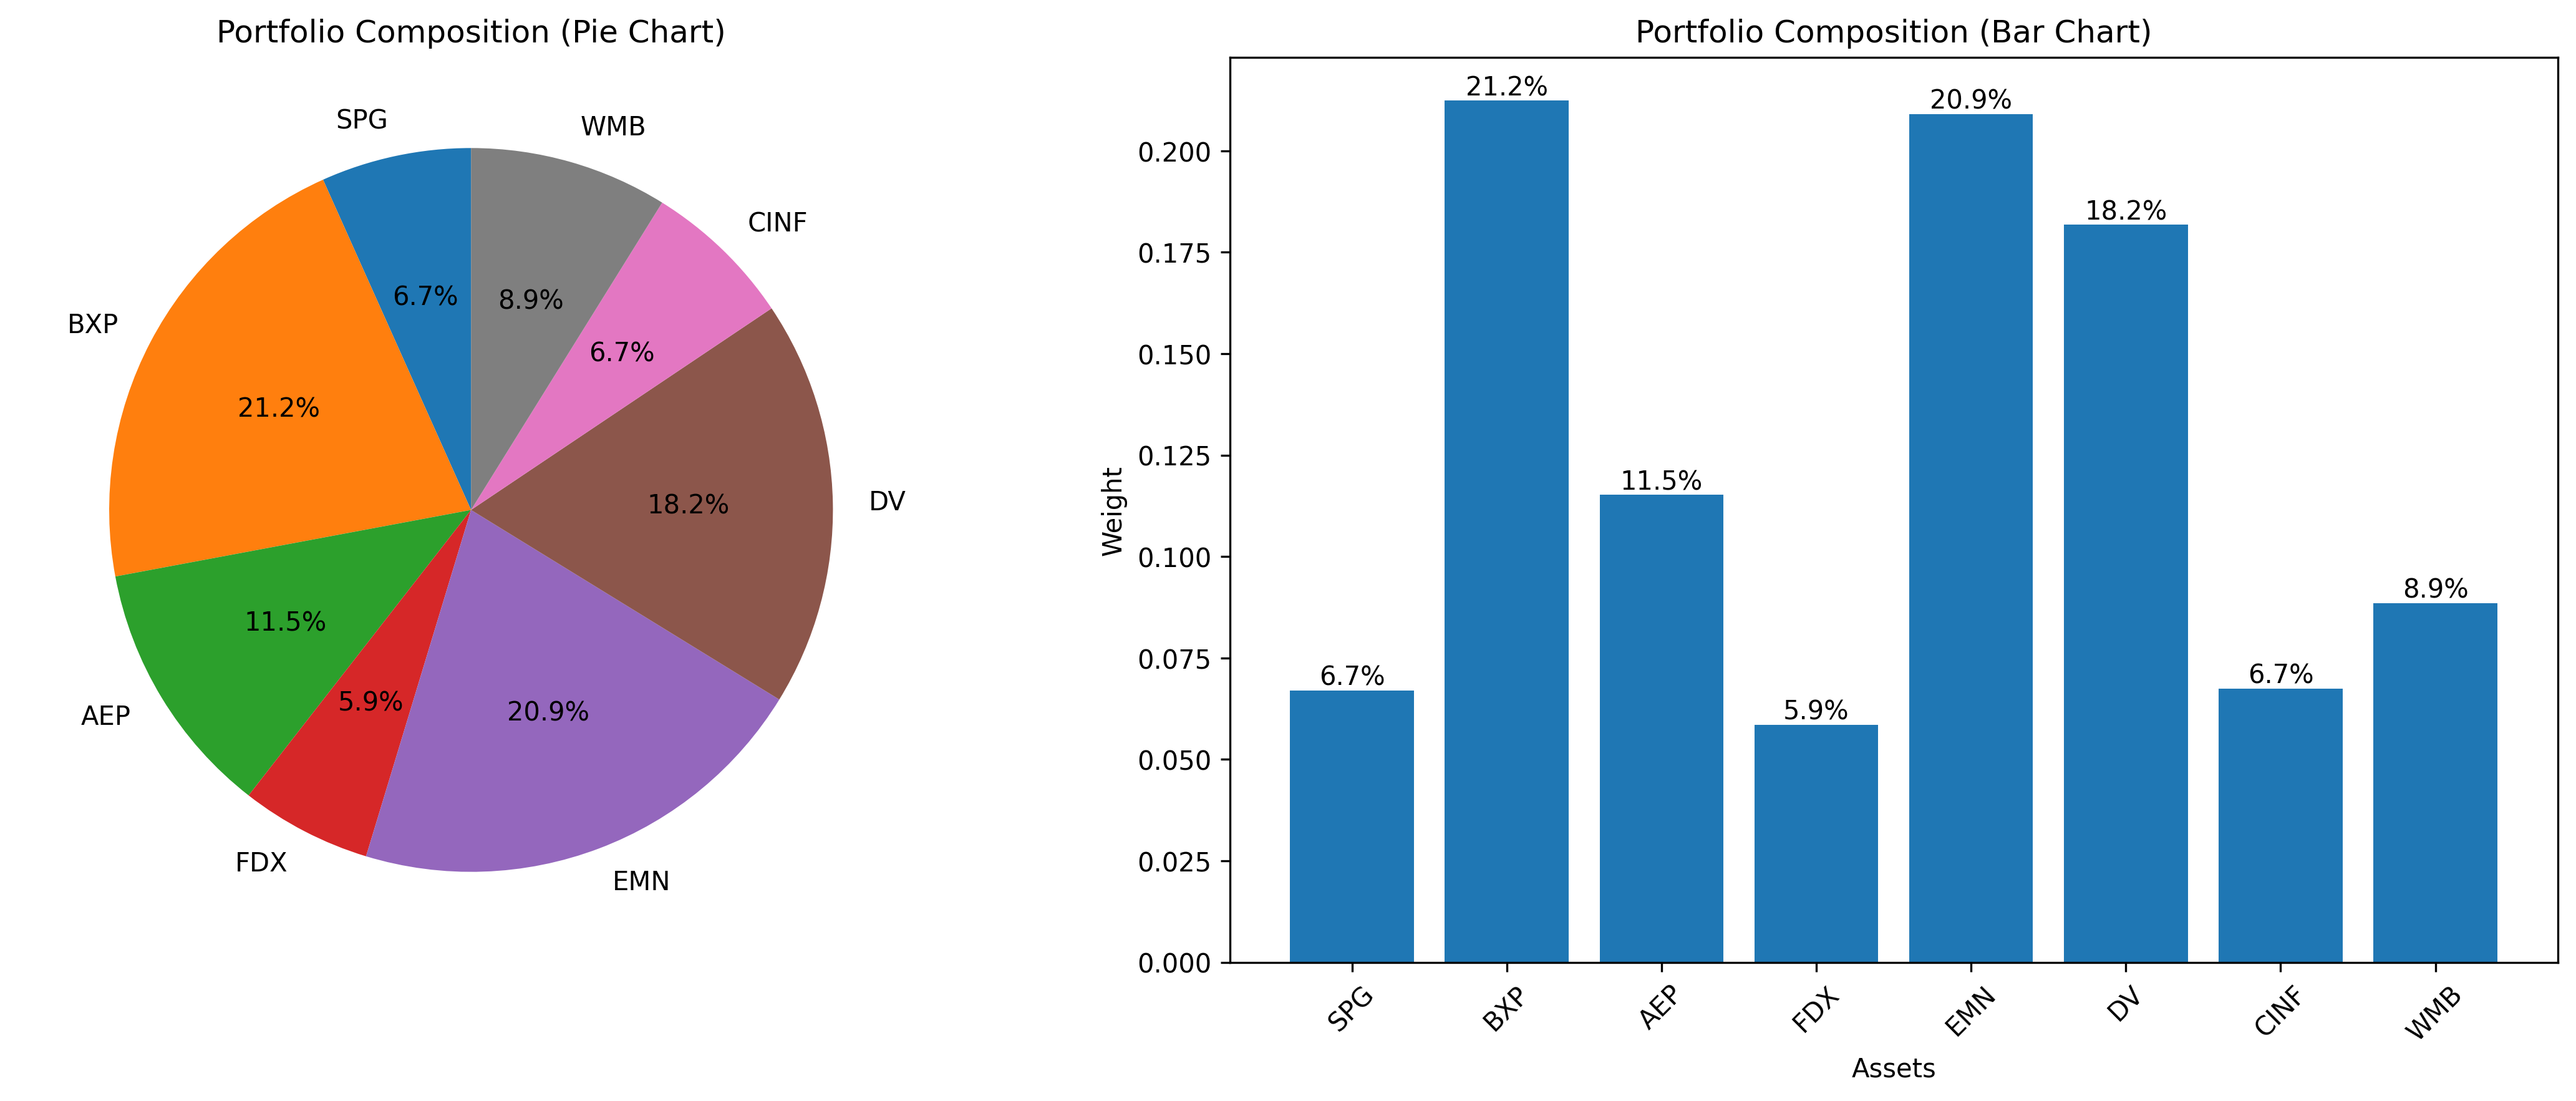

---

### Message 4: Image

**Intention:** Compare the portfolio's growth over time against the benchmark, providing a clear performance comparison.

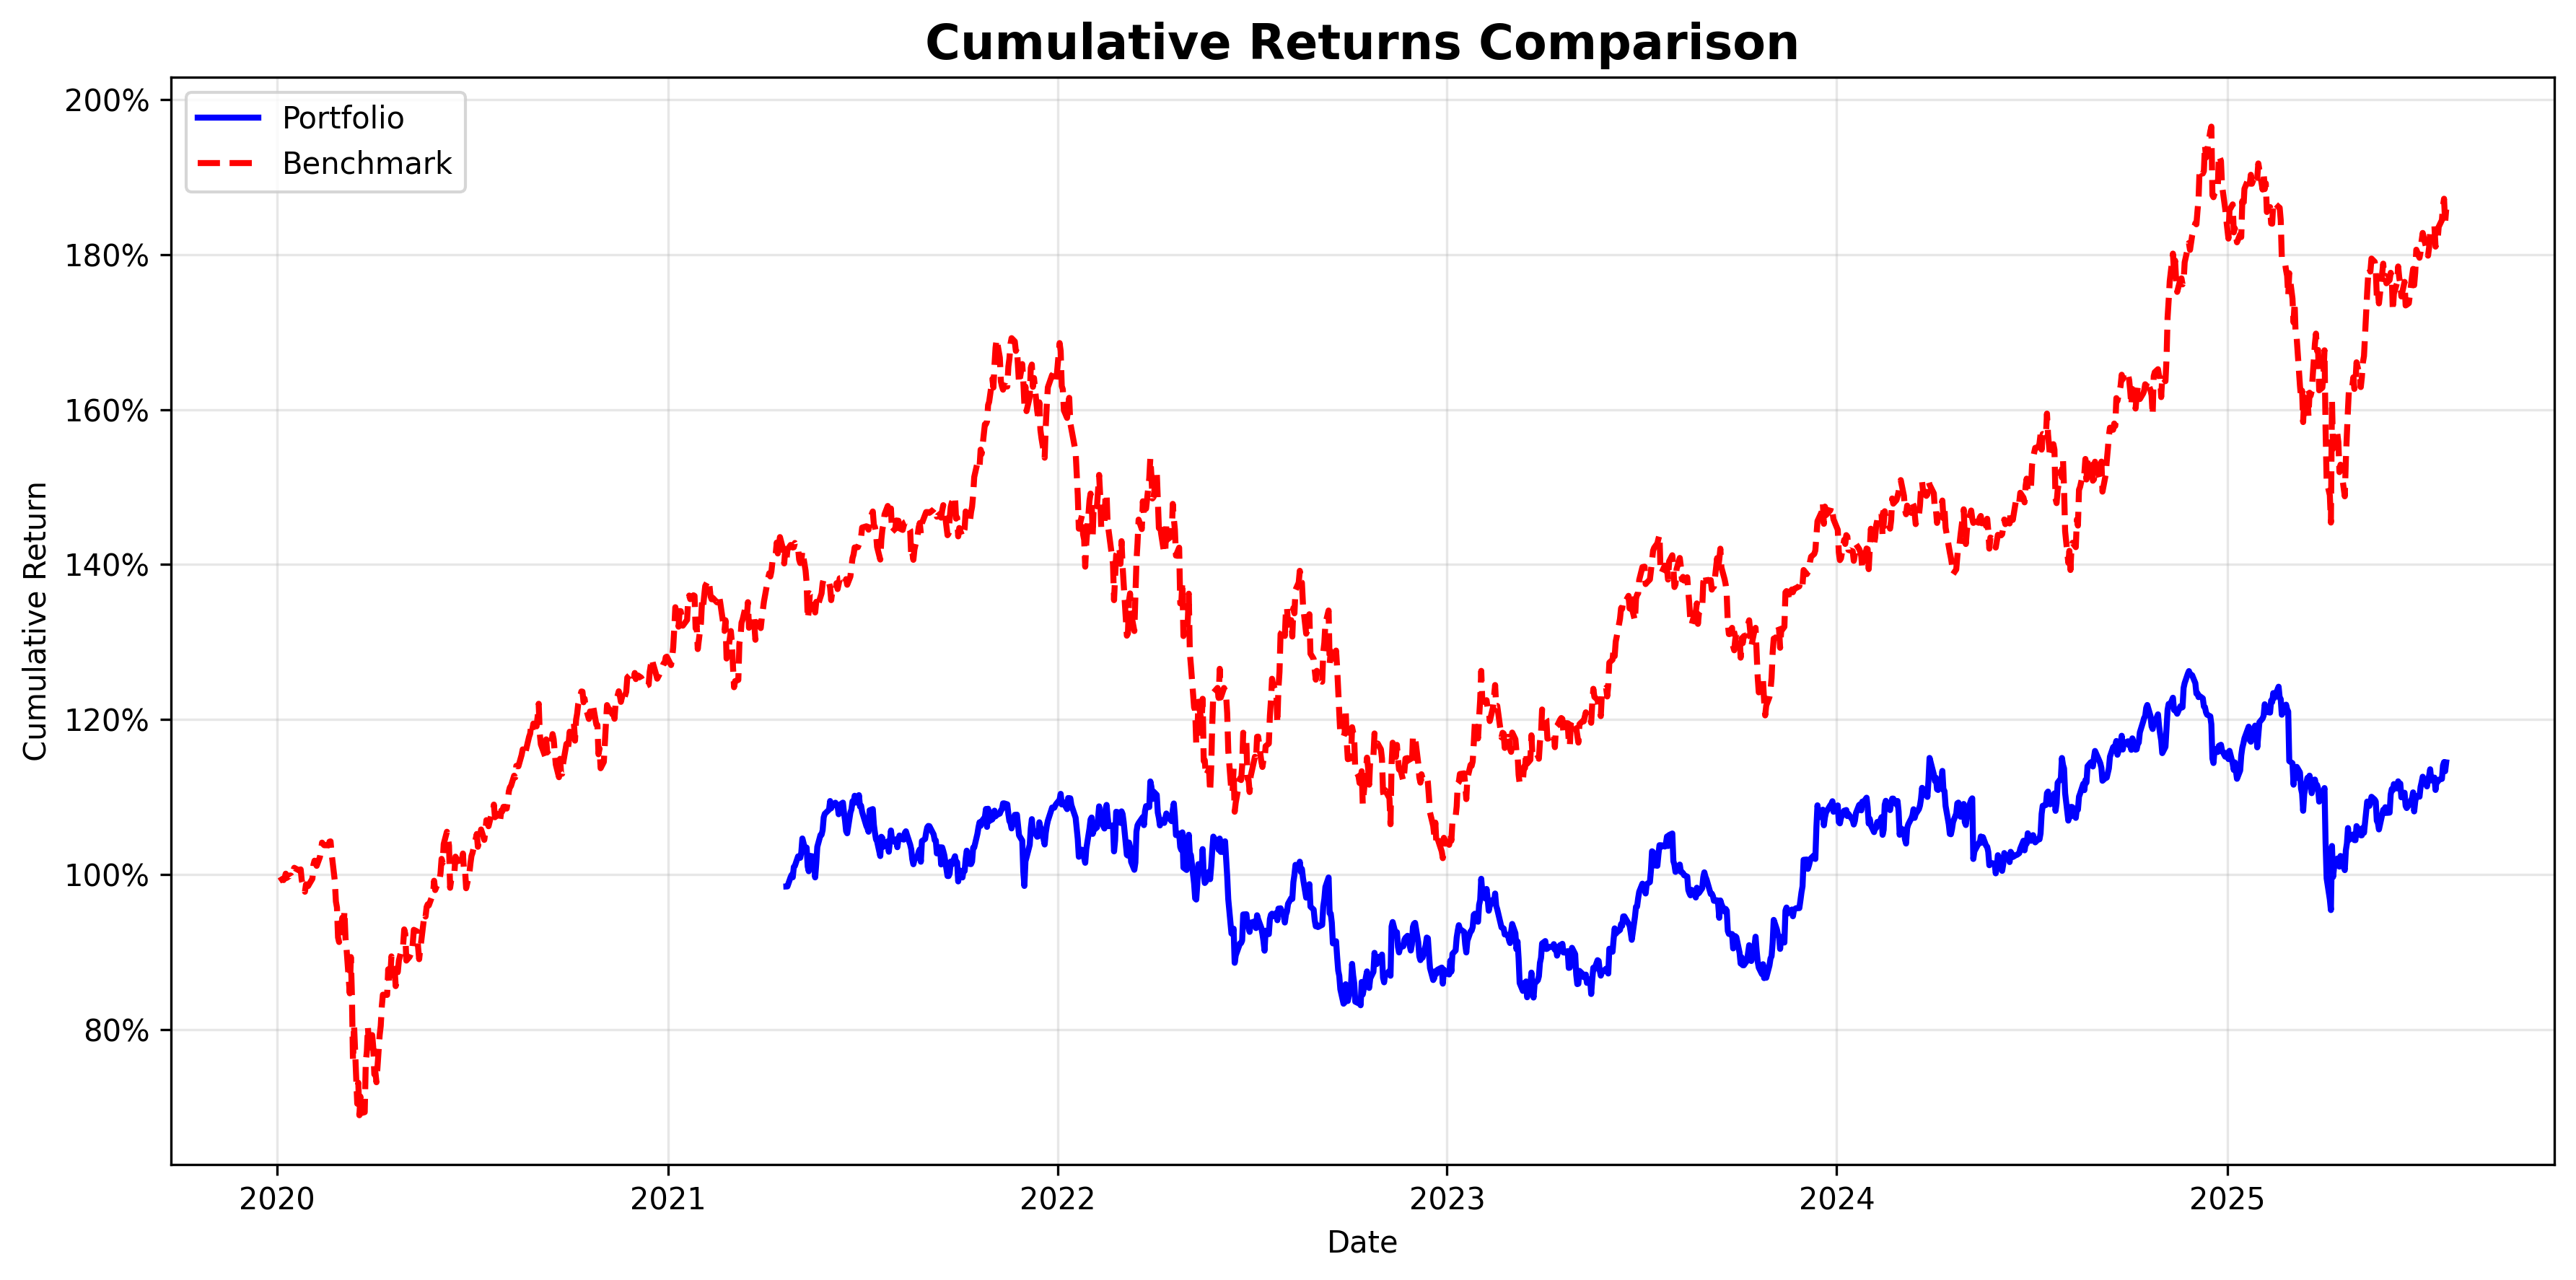

---

### Message 5: Image

**Intention:** Visualize the portfolio's peak-to-trough declines, highlighting periods of significant loss.

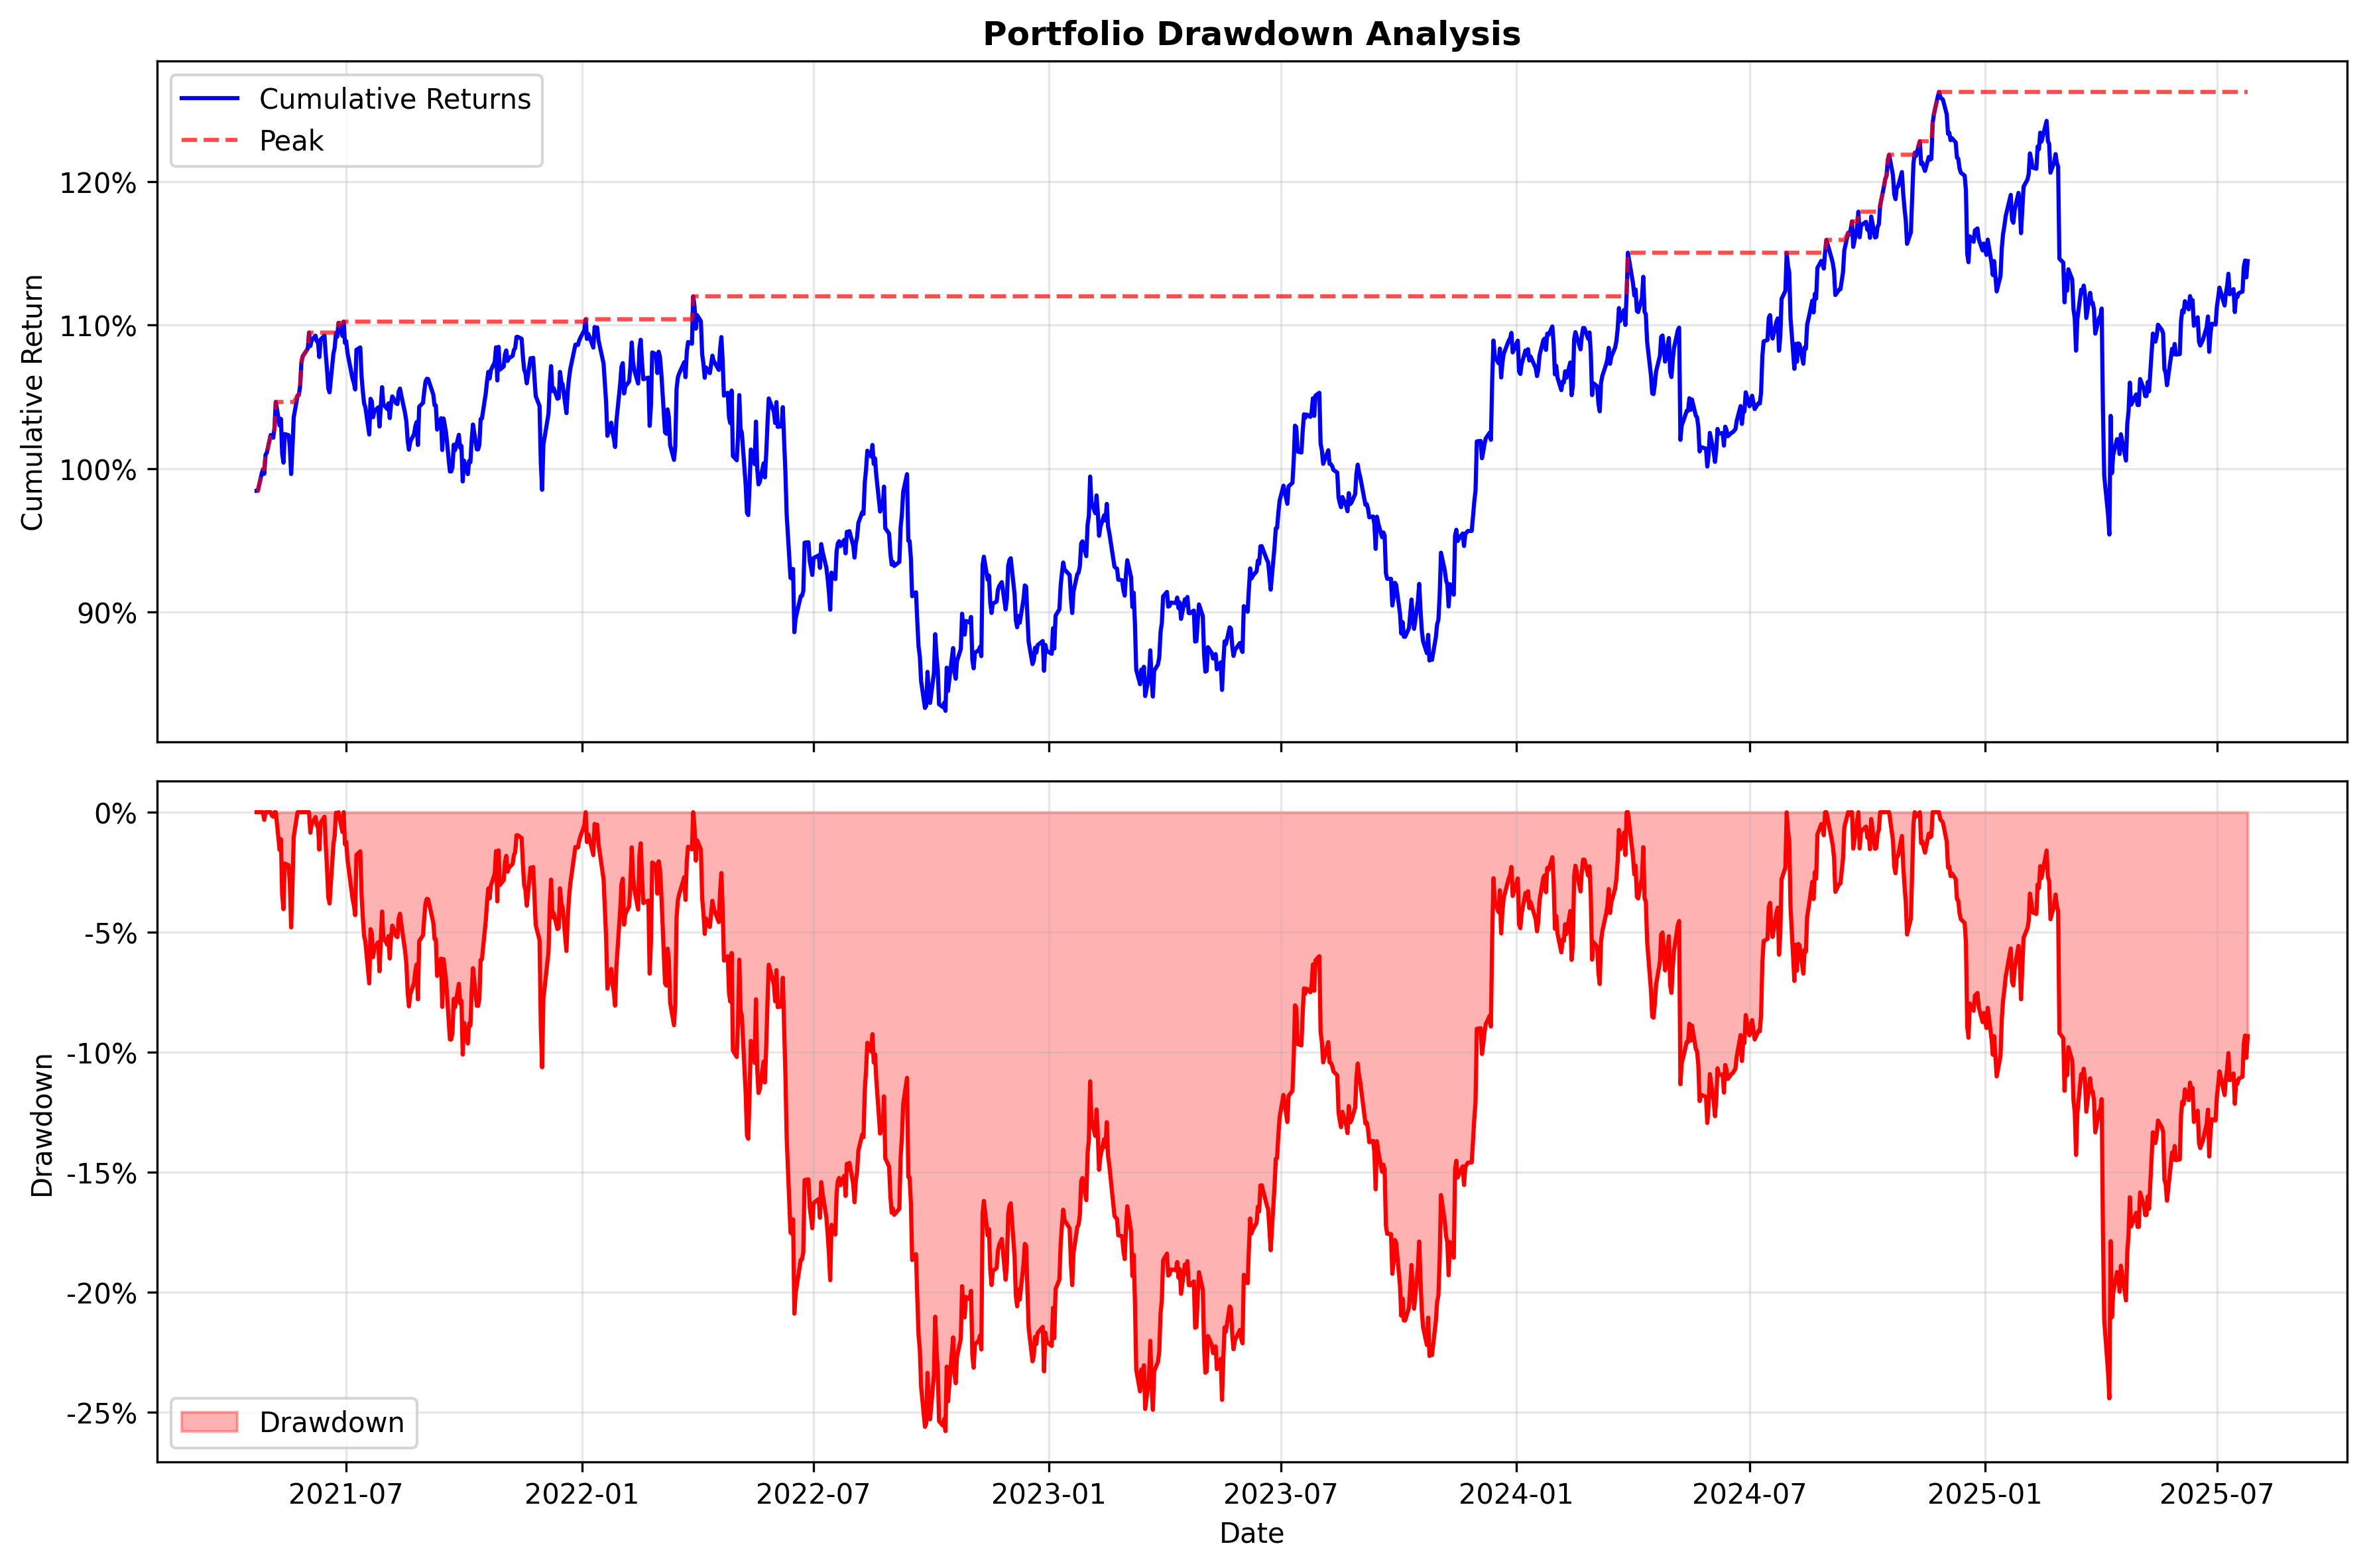

---

### Message 6: Image

**Intention:** Show the correlation between assets, which is crucial for understanding diversification.

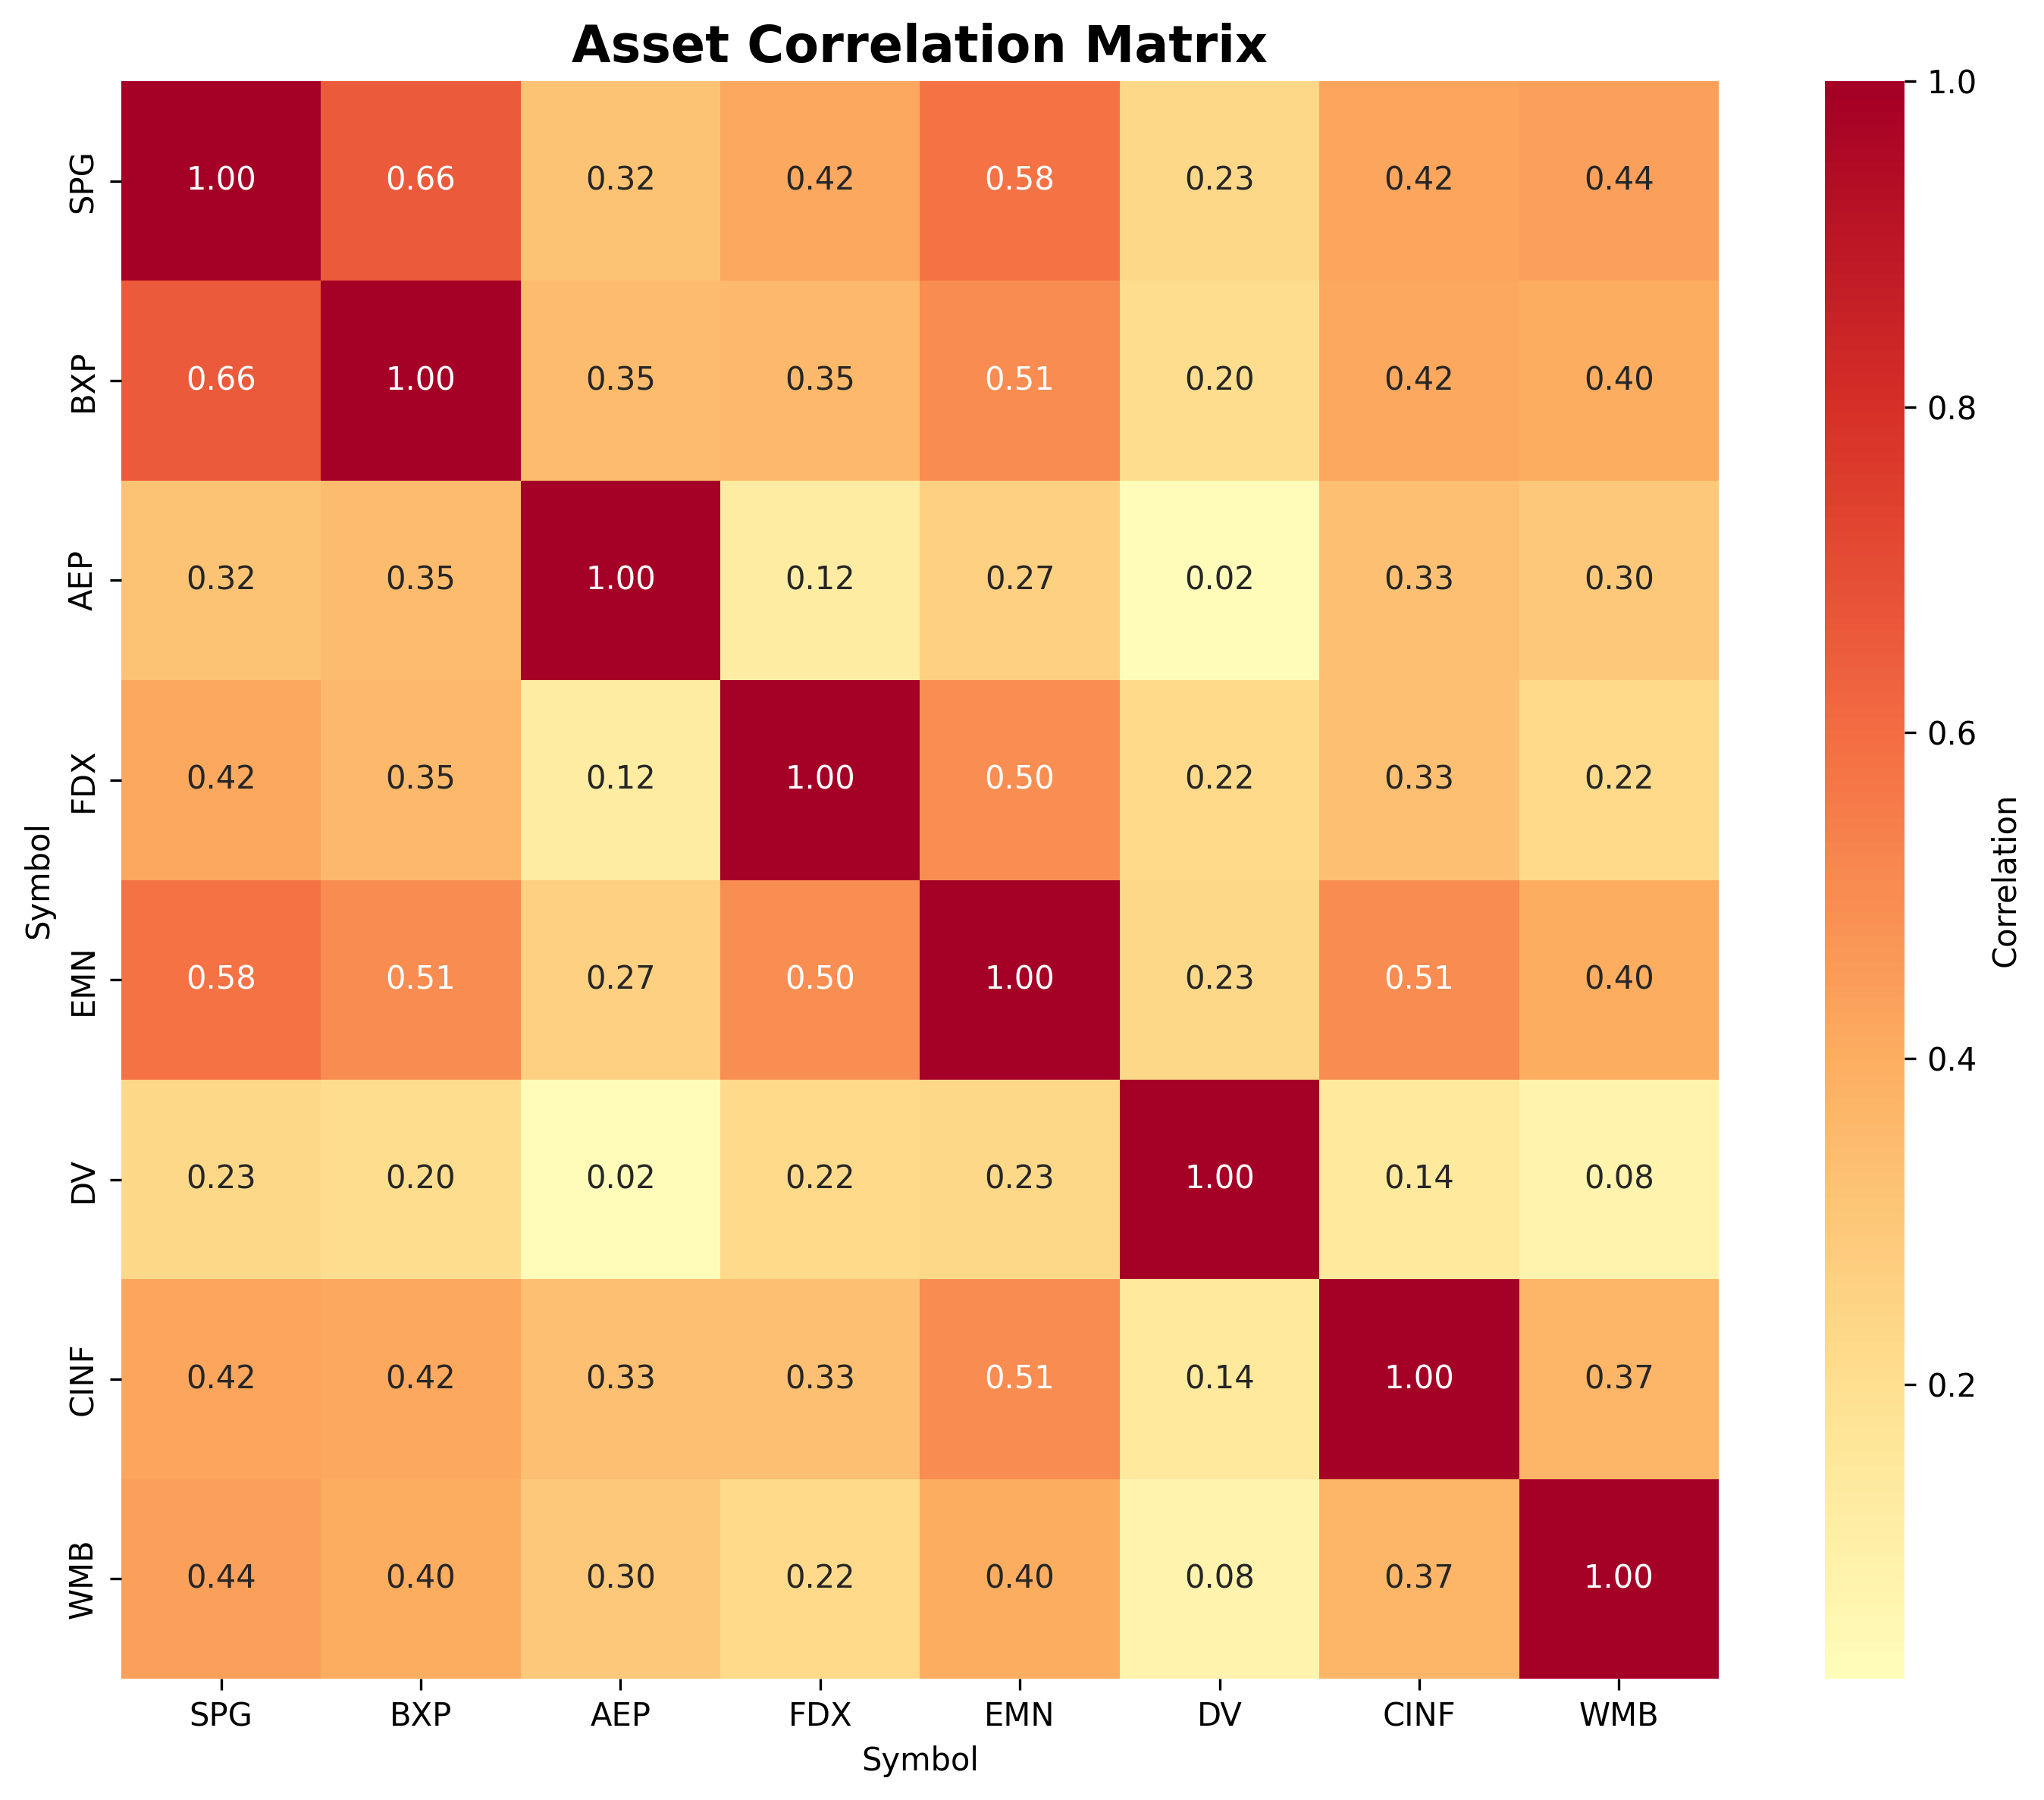

---

### Message 7: Image

**Intention:** Provide insight into the statistical properties of the portfolio's returns, such as its central tendency, dispersion, and symmetry.

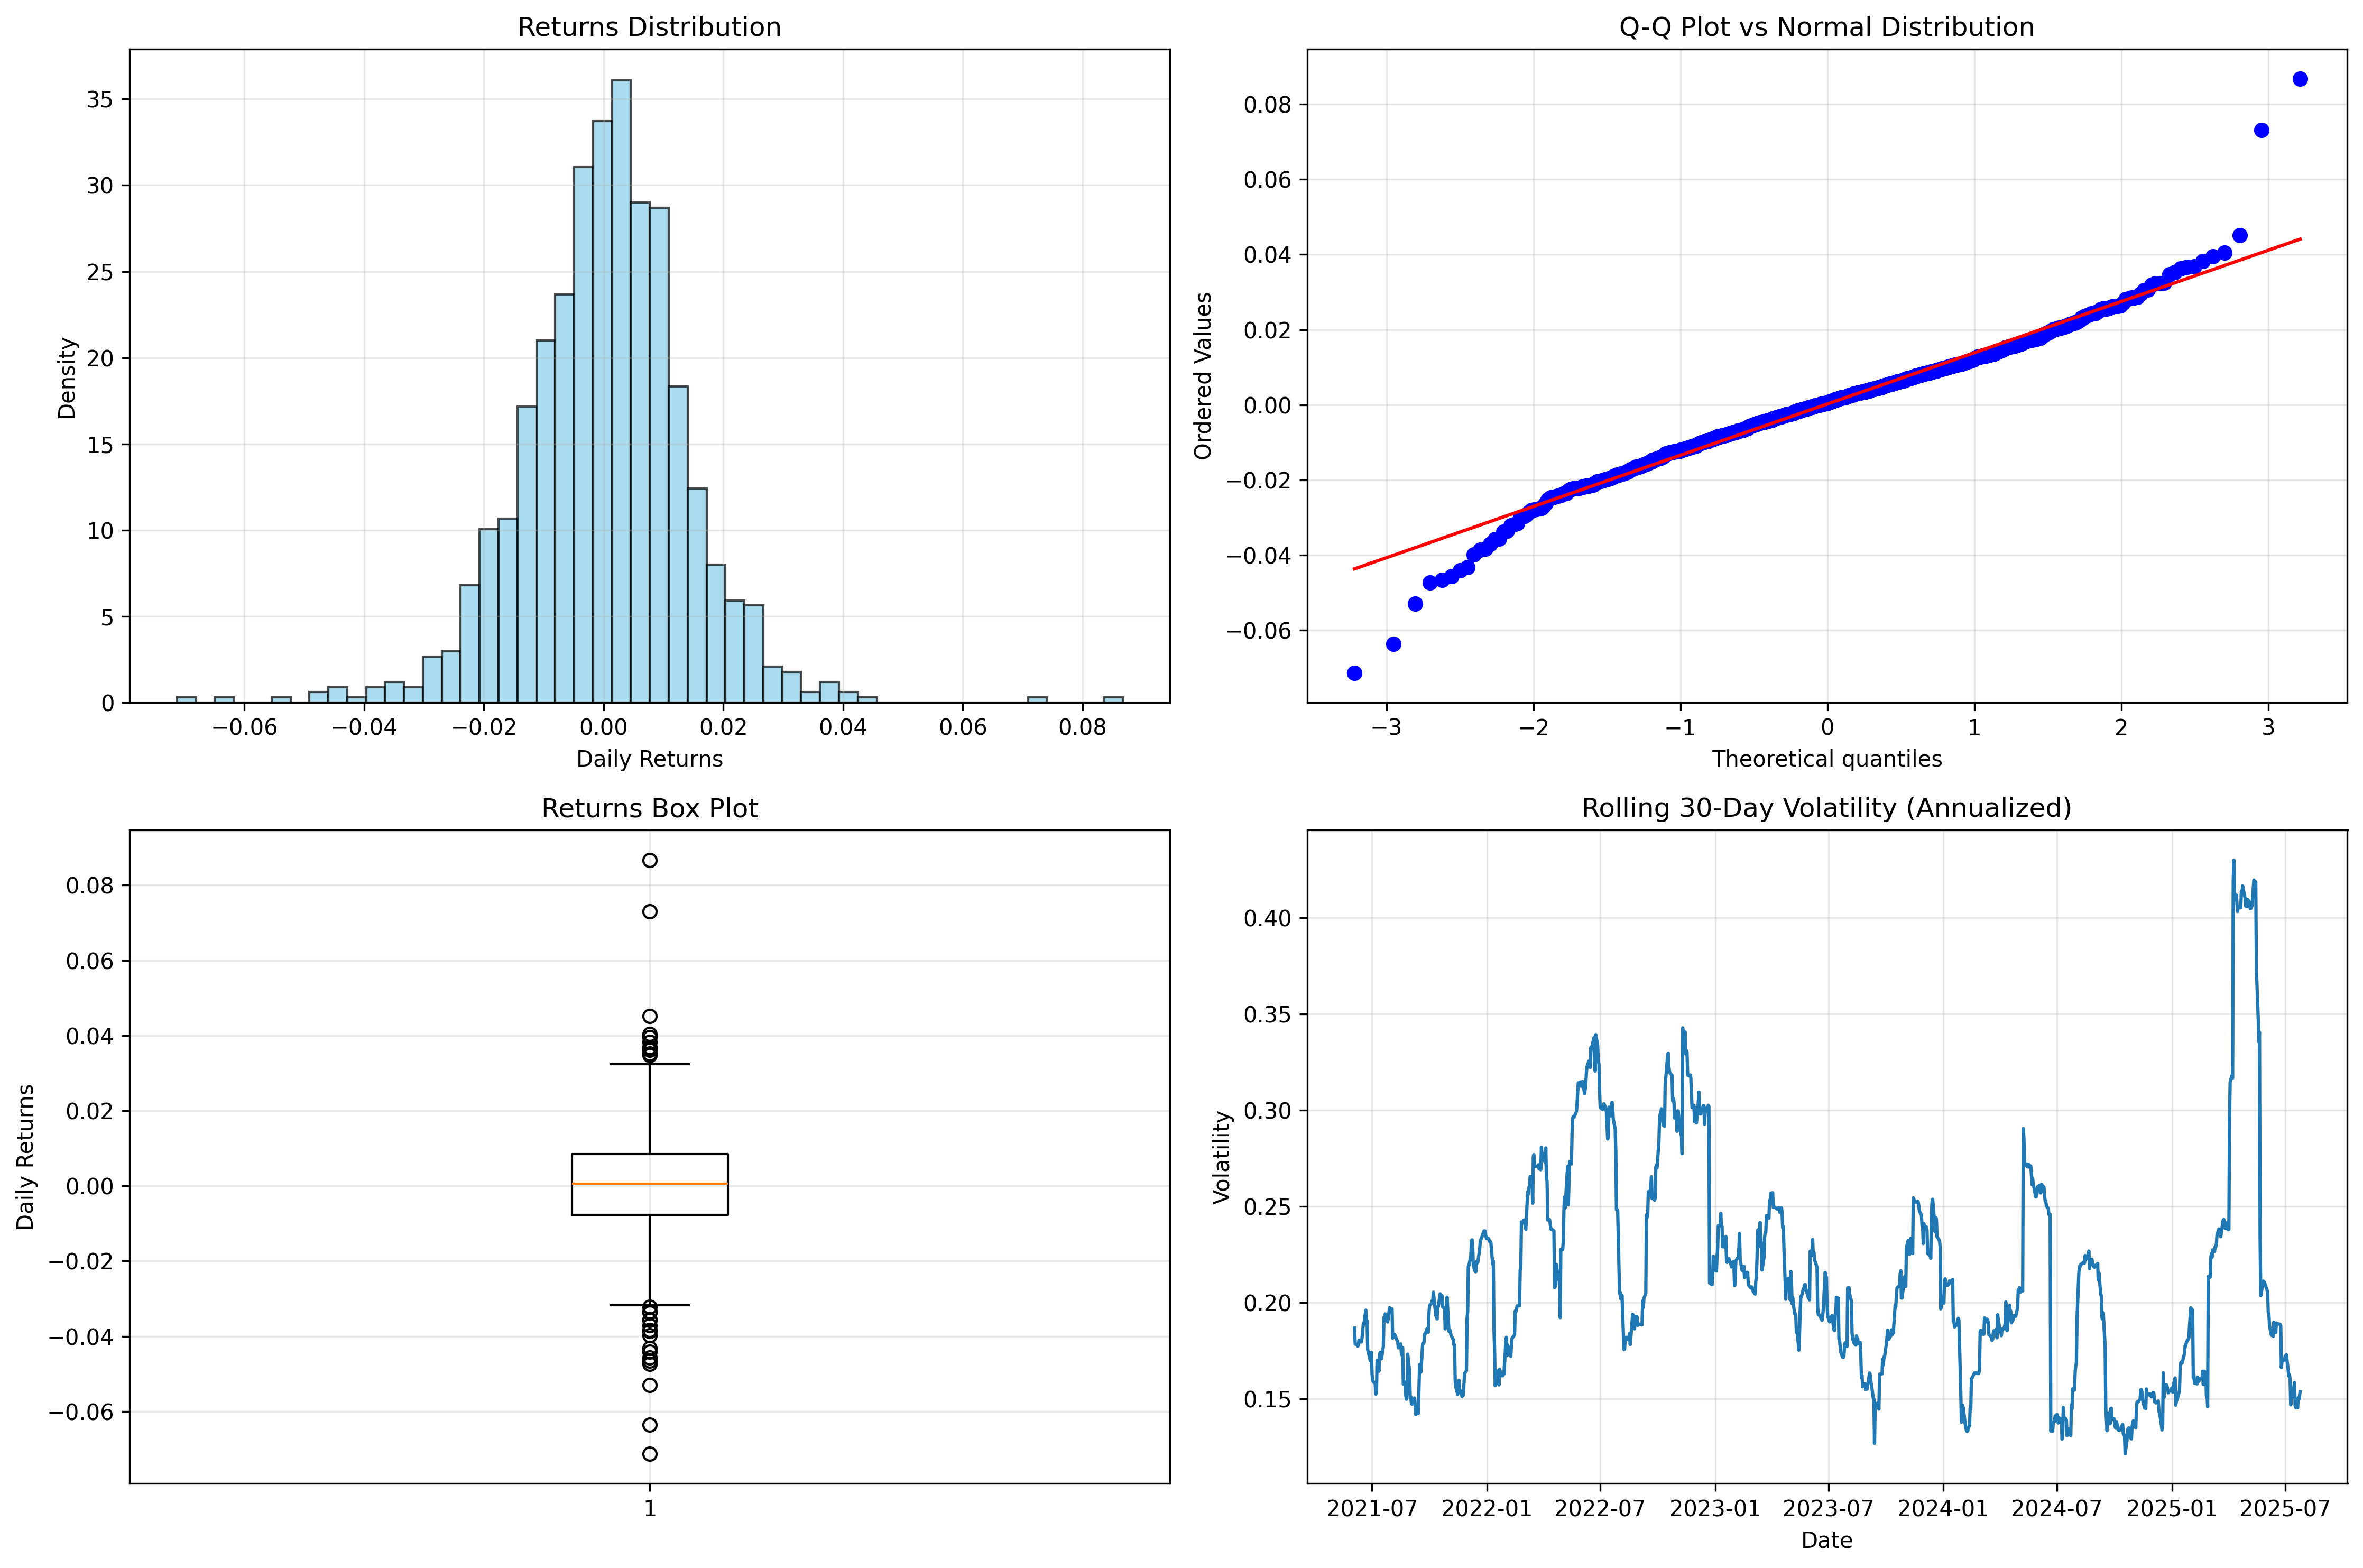

---

In [7]:
# Display messages only if they exist
if llm_messages:
    for i, message in enumerate(llm_messages):
        display(Markdown(f"### Message {i+1}: {message['type'].capitalize()}"))
        display(Markdown(f"**Intention:** {message['intention']}"))
        
        if message['type'] == 'text':
            display(Markdown(message['content']))
        elif message['type'] == 'image':
            img_data = base64.b64decode(message['content'])
            display(Image(data=img_data))
        
        display(Markdown("---"))
else:
    display(Markdown("### No messages to display"))
    display(Markdown("Please ensure the cache is populated with stock and ETF data before running this demo."))